# Import of data and libraries 

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

In [5]:
data = pd.read_csv("../data/all_data.csv")

In [6]:
# Add the date column 
real_BNB = data.BNB[32:232]
real_BTC = data.BTC[32:232]
real_ETH = data.ETH[32:232]

date = data.Date[32:232]

In [57]:
df_nupl.columns = ["NUPL_with_sentiment", "NUPL_without_sentiment", "date"]
df_nupl = df_nupl.set_index('date')

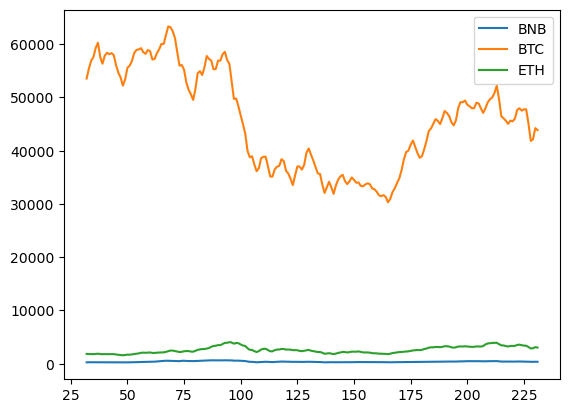

In [37]:
# Plot the three cryptos prices on the same graph
plt.plot(real_BNB, label='BNB')
plt.plot(real_BTC, label='BTC')
plt.plot(real_ETH, label='ETH')

# Add a legend to the plot
plt.legend()

# NUPL with VS without sentiment

In [15]:
df_1 = pd.read_csv("../data/nupl_200_steps_with_sentiment.csv", index_col="Unnamed: 0")

In [16]:
df_2 = pd.read_csv("../data/nupl_200_steps_without_sentiment.csv", index_col="Unnamed: 0")

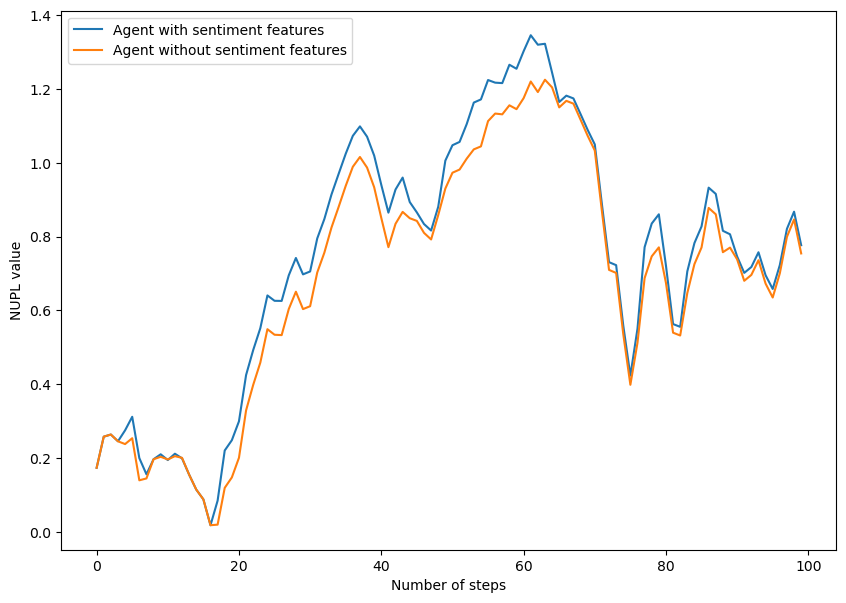

In [18]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(df_1[:100], label='Agent with sentiment features')

ax.plot(df_2[:100], label=f"Agent without sentiment features")
    
ax.set_xlabel("Number of steps")
ax.set_ylabel("NUPL value")
ax.legend(loc="upper left")

plt.show()

In [22]:
print(f"Mean NUPL of the agent using sentiment features {round(np.mean(df_1[:100].values), 3)}")
print(f"Mean NUPL of the agent not using sentiment features {round(np.mean(df_2[:100].values), 3)}")

Mean NUPL of the agent using sentiment features 0.746
Mean NUPL of the agent not using sentiment features 0.691


# NUPL Greedy vs $\epsilon$-Greedy

In [102]:
with_sentiment = True
epsilon_greedy = True 

df_1 = pd.read_csv(f"../data/NUPLS_sentiment_{with_sentiment}_epsilon_{epsilon_greedy}.csv")

In [99]:
epsilon_greedy = False
df_2 = pd.read_csv(f"../data/NUPLS_sentiment_{with_sentiment}_epsilon_{epsilon_greedy}.csv") 

In [100]:
df_nupl = pd.DataFrame(np.hstack((np.hstack((np.array(df_1.values), np.array(df_2.values))), date)))
df_nupl.columns = ["Epsilon_Greedy_NUPL_with_sentiment", "Greedy_NUPL_with_sentiment", "date"]
df_nupl = df_nupl.set_index('date')
df_nupl.head()

,Epsilon_Greedy_NUPL_with_sentiment,Greedy_NUPL_with_sentiment
date,,
2021-03-09,0.173231,0.173231
2021-03-10,0.257627,0.257627
2021-03-11,0.263462,0.263462
2021-03-12,0.143211,0.245098
2021-03-13,0.146989,0.274877


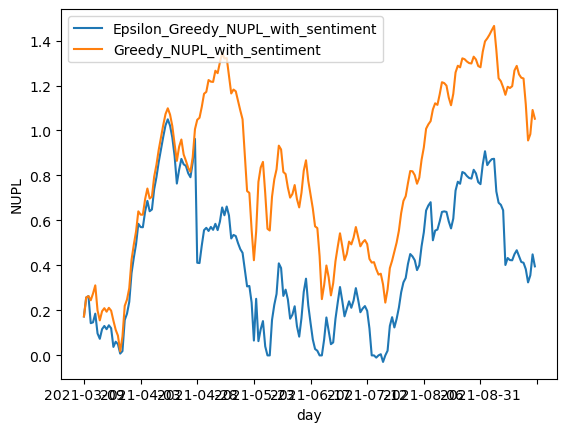

In [101]:
ax = df_nupl.plot(kind='line', y=['Epsilon_Greedy_NUPL_with_sentiment', 'Greedy_NUPL_with_sentiment'], xlabel='day', ylabel='NUPL')

# Show the plot
plt.show()

# NUPL Greedy vs $\epsilon$ Greedy

In [23]:
with_sentiment = True
epsilon_greedy = False 

df_nupl = pd.read_csv(f"../data/NUPLS_sentiment_{with_sentiment}_epsilon_{epsilon_greedy}.csv")
df_nupl.head()

,0
0,0.173231
1,0.257627
2,0.263462
3,0.245098
4,0.274877


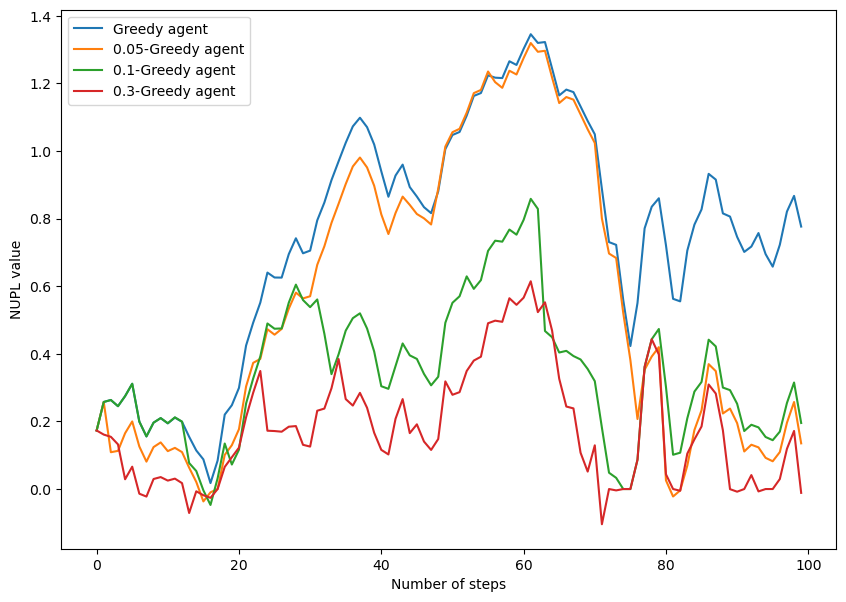

In [25]:
epsilon_greedy = True
epsilons = [0.05, 0.1, 0.3]

fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(df_nupl[:100], label='Greedy agent')

for epsilon in epsilons:
    df = pd.read_csv(f"../data/NUPLS_sentiment_{with_sentiment}_{epsilon}_{epsilon_greedy}.csv") 
    ax.plot(df[:100], label=f"{epsilon}-Greedy agent")
    
ax.set_xlabel("Number of steps")
ax.set_ylabel("NUPL value")
ax.legend(loc="upper left")

plt.show()